### MACHINE LEARNING PROJECT

To start this project I need a dataset. I couldn't find an apropiate one, but I found [this repository][1] by  
Lucas David that gave me a great starting point.

Using his code I downloaded a big amount of pictures of some artis with a noticeable style difference:

* Caravaggio
* Edgar Degas
* Francisco de Goya
* Katsushika Hokusai
* Frida Kahlo
* Wassily Kandinsky
* Gustav Klimt
* Roy Lichtenstein
* Piet Mondrian
* Claude Monet
* Pablo Picasso
* Jackson Pollock
* Joaquín Sorolla
* Diego Velazquez
* Andy Warhol

It took me around three hours to get about 5500 pictures.

In this notebook I made basic operations with images and define the functions that let me build my own dataset.

[1]: https://github.com/lucasdavid/wikiart

___
### PREREQUISITES

Create a virtual environment via terminal:  

`python -m venv museum_env`

Open the venv with the following commands:  

Win: `museum_env\Scripts\activate.bat`  

Mac: `source museum_env\bin\activate`  

Now install all requirements with:  

`pip install requirements.txt`

~~pip freeze > requirements.txt~~  
~~conda env export > environment.yml~~

___
### IMPORTS

In [2]:
# Modules used for data handling / test
import csv
import os

from utils import get_collection, show_collection, nameof


# Modules used for EDA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Modules used for image processing
from utils import crop_img, chi_osc, extract_img_data, get_img_rgb
from utils import resize_img, reduce_col_palette, whitespace


# Modules used for ML
from utils import color_quant

In [3]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

___
### UPDATE UTILS

In [4]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils

___
### BASIC OPERATIONS: GETTING IMAGES

In [5]:
collection = get_collection(path='./sample_img/', extensions=['.jpg'])

collection

[PurePosixPath('sample_img/R&M_01.jpg'),
 PurePosixPath('sample_img/R&M_02.jpg'),
 PurePosixPath('sample_img/R&M_04.jpg'),
 PurePosixPath('sample_img/R&M_03.jpg'),
 PurePosixPath('sample_img/R&M_05.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_01.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_02.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_04.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_03.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_05.jpg')]

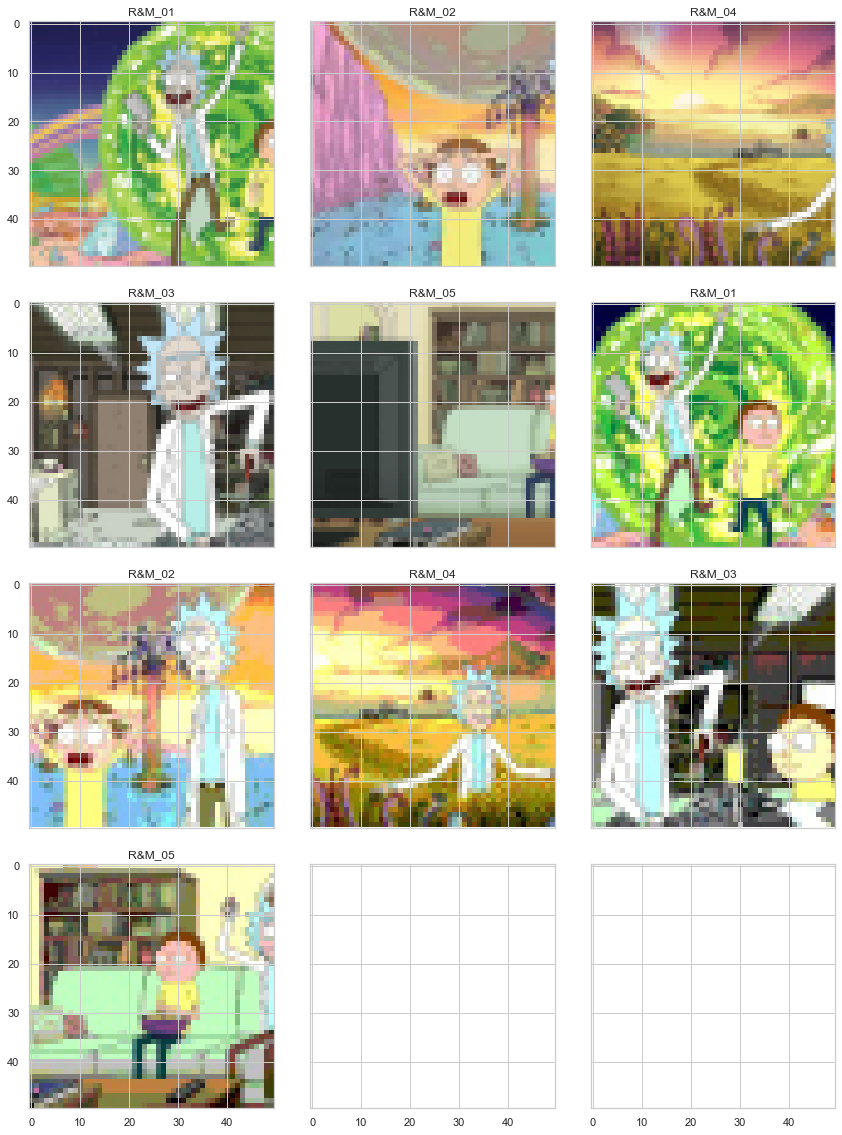

In [6]:
show_collection(collection, cols=3)

___
### BASIC OPERATIONS: IMAGES MANIPULATION

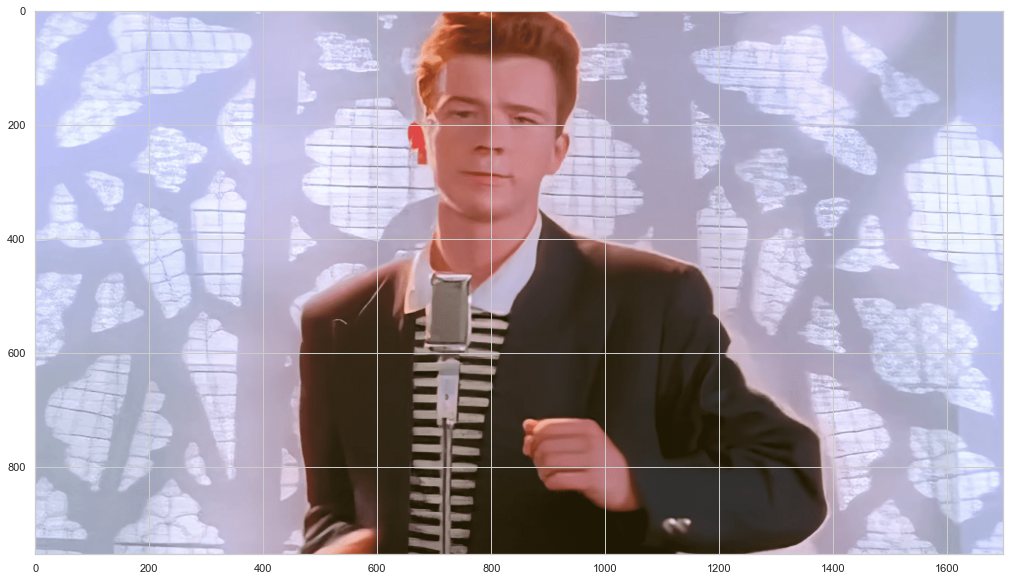

In [7]:
sample = get_img_rgb('./sample_img/secret/sample.jpeg')
plt.imshow(sample);

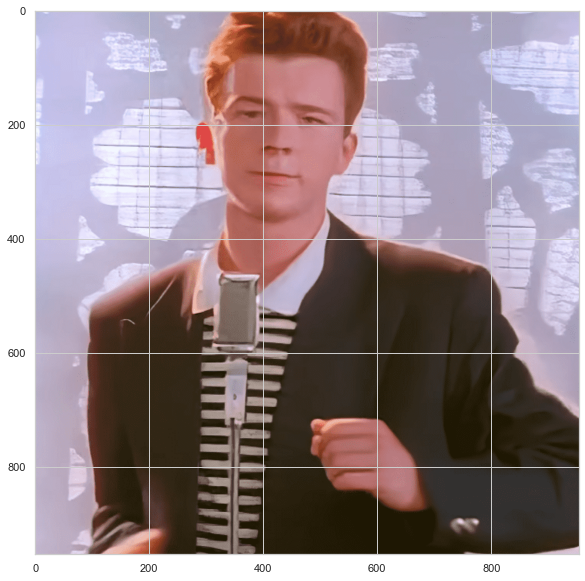

In [8]:
sample = crop_img(sample)
plt.imshow(sample);

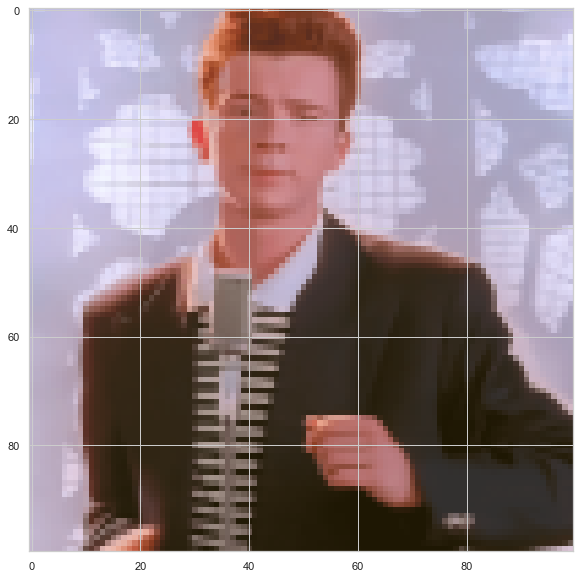

In [9]:
sample = resize_img(sample, 100)
plt.imshow(sample);

Palette reduced to 125 colors.


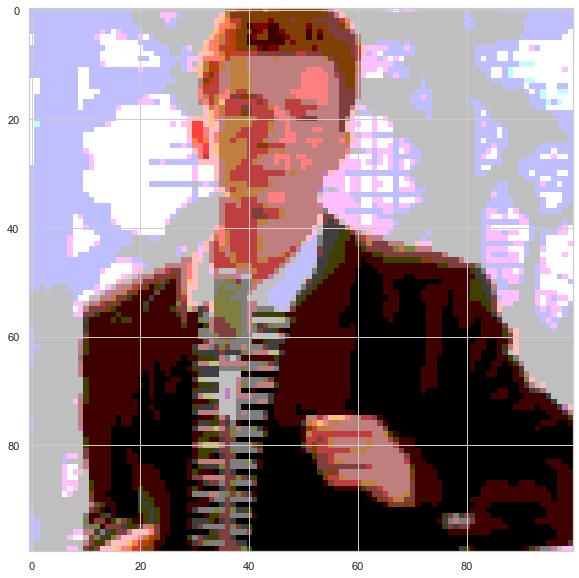

In [10]:
sample = reduce_col_palette(sample, 5, info=True)
plt.imshow(sample);

___
### BASIC OPERATIONS: DATA EXTRACTION

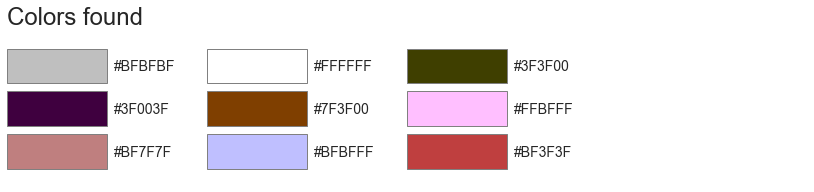

In [11]:
colors, dic_colors = color_quant(sample, 5, num_of_colors=10, show_chart=True)

In [12]:
colors

['#BFBFBF',
 '#3F003F',
 '#BF7F7F',
 '#FFFFFF',
 '#3F003F',
 '#7F3F00',
 '#BFBFFF',
 '#3F3F00',
 '#FFBFFF',
 '#BF3F3F']

In [13]:
whitespace(sample)

0.99

In [14]:
chi_osc(sample)

0.05249204665959703

In [23]:
# This cell will raise an exception if the folder already exists
 
data_collection, errors_log = extract_img_data(collection,
                                               square_crop=True,
                                               resize=True,
                                               height=100,
                                               limit_colors=True,
                                               colors_per_channel=5,
                                               target_class='dset_sample',
                                               save=True,
                                               save_path='./sample_img')

0 errors raised from 10 pictures in dset_sample collection.


In [24]:
columns_names = ['img_ID', 'artist', 'height', 'width', 'whitespace',
                 'chiaroscuro', 'color_01', 'color_02', 'color_03',
                 'color_04', 'color_05', 'color_06', 'color_07',
                 'color_08', 'color_09', 'color_10']

df = pd.DataFrame(data_collection, columns=columns_names)

df

,img_ID,artist,height,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10
0,R&M_01,dset_sample,100,100,0.99,33.00000,#BFFF7F,#3F7F3F,#7FBF3F,#FFFFFF,#00003F,#FFFF3F,#FFFFBF,#BFBFBF,#3FBF3F,#FFFF7F
1,R&M_02,dset_sample,100,100,0.99,99.00000,#FFBFBF,#FFFF7F,#BF7F7F,#FFFFFF,#7F3F3F,#7FBFBF,#FFBF7F,#FFFFBF,#BFBF7F,#7FBFFF
2,R&M_04,dset_sample,100,100,0.99,4.95000,#FFBF3F,#BF7F00,#FFFFFF,#7F3F7F,#3F0000,#FFFF7F,#7F3F00,#BFBF7F,#7F7F00,#FF7F7F
3,R&M_03,dset_sample,100,100,0.99,0.16203,#7F3F00,#FFFFFF,#3F3F3F,#7F7F7F,#FFFFBF,#000000,#BFBFBF,#BFFFFF,#3F3F3F,#FFFF7F
4,R&M_05,dset_sample,100,100,0.99,1.04211,#7FBF7F,#BFFFBF,#7F3F00,#3F0000,#BFBF7F,#FFFFBF,#BFBFBF,#7F7F3F,#7F7F7F,#3F3F3F
5,R&M_01,dset_sample,100,100,1.00,1.53846,#BFFF3F,#3FBF3F,#FFFFBF,#000000,#7FBF3F,#BFBFBF,#7F3F00,#FFFFFF,#FFFF7F,#007F00
6,R&M_02,dset_sample,100,100,0.99,14.14286,#7FBFFF,#FFFF7F,#BFBFBF,#FFFFFF,#3F3F00,#FFFFBF,#BF7F7F,#FFBF7F,#7F7F3F,#FFBF3F
7,R&M_04,dset_sample,100,100,0.99,1.65000,#FFBF3F,#7F3F3F,#FFFFFF,#7F7F00,#BFBF7F,#FFFF7F,#3F0000,#BF7F00,#BF3F7F,#FF7F7F
8,R&M_03,dset_sample,100,100,0.99,0.11661,#FFFFFF,#3F3F3F,#7F7F7F,#BFBFBF,#000000,#3F3F3F,#7F3F00,#FFFFBF,#BFFFFF,#FFFF7F
9,R&M_05,dset_sample,100,100,0.99,0.40408,#BFFFBF,#3F3F3F,#7F7F3F,#FFFFBF,#BFBF7F,#BFBFBF,#000000,#FFFFFF,#7F7F7F,#3F3F3F


In [25]:
errors_log[-1]

'0 errors raised from 10 pictures in dset_sample collection.'

___
### BUILD DATASET
I decided to build 4 versions of the dataset. The dataset is made of a collecion of images and a .csv file with the information gathered.  
This four datasets can be used for supervised and non supervised algoritms.

| Dataset | Max. height | Square format (cropped) |  Possible colors (channel) | Possible colors (palette) | Images | Size | Computing time |
| :--- | ---: | :--: | :--: | :--: | ---: | ---: | ---: |
| big_museum    | 500 px | No  | 6 | 216 | 5020  |   | 42700 s ≈ 12 h |
| large_museum  | 250 px | No  | 5 | 125 |   |   | 200 mins |
| medium_museum | 150 px | Yes | 5 | 125 |   |   | 200 mins |
| small_museum  |   50 px| Yes | 4 |  64 | 4308  |   | 1712 s |

In addition, I extract basic information of the raw images.  

This section of the notebook was turned into .py files and executed from a terminal to lighten the process.

First of all, I will create a *collection* for each artist that later on I will merge into a *museum*.

In [26]:
valid_extensions = ['.jpg', '.jpeg']

dset_caravaggio = get_collection('./images/raw_museum/caravaggio/', valid_extensions)
dset_degas = get_collection('./images/raw_museum/degas', valid_extensions)
dset_goya = get_collection('./images/raw_museum/goya', valid_extensions)
dset_hokusai = get_collection('./images/raw_museum/hokusai', valid_extensions)
dset_kahlo = get_collection('./images/raw_museum/kahlo', valid_extensions)
dset_kandinsky = get_collection('./images/raw_museum/kandinsky', valid_extensions)
dset_klimt = get_collection('./images/raw_museum/klimt', valid_extensions)
dset_lichtenstein = get_collection('./images/raw_museum/lichtenstein', valid_extensions)
dset_mondrian = get_collection('./images/raw_museum/mondrian', valid_extensions)
dset_monet = get_collection('./images/raw_museum/monet', valid_extensions)
dset_picasso = get_collection('./images/raw_museum/picasso', valid_extensions)
dset_pollock = get_collection('./images/raw_museum/pollock', valid_extensions)
dset_sorolla = get_collection('./images/raw_museum/sorolla', valid_extensions)
dset_velazquez = get_collection('./images/raw_museum/velazquez', valid_extensions)
dset_warhol = get_collection('./images/raw_museum/warhol', valid_extensions)

# By now, the museum is just a index
museum = [dset_caravaggio, dset_degas, dset_goya, dset_hokusai, dset_kahlo,
          dset_kandinsky, dset_klimt, dset_lichtenstein, dset_mondrian, dset_monet,
          dset_picasso, dset_pollock, dset_sorolla, dset_velazquez, dset_warhol]

In [27]:
artists = ['caravaggio', 'degas', 'goya', 'hokusai', 'kahlo',
           'kandinsky', 'klimt', 'lichtenstein', 'mondrian', 'monet',
           'picasso', 'pollock', 'sorolla', 'velazquez', 'warhol']

raw_data_collections = [artist + '_raw_collection' for artist in artists]
raw_errors_log = [artist + '_raw_errors' for artist in artists]

big_data_collections = [artist + '_big_collection' for artist in artists]
big_errors_log = [artist + '_big_errors' for artist in artists]

large_data_collections = [artist + '_large_collection' for artist in artists]
large_errors_log = [artist + '_large_errors' for artist in artists]

medium_data_collections = [artist + '_medium_collection' for artist in artists]
medium_errors_log = [artist + '_medium_errors' for artist in artists]

small_data_collections = [artist + '_small_collection' for artist in artists]
small_errors_log = [artist + '_small_errors' for artist in artists]

In [ ]:
# Build raw_data
raw_museum = []

for artist, data_collection, img_collection, errors_log in zip(artists, raw_data_collections, museum, raw_errors_log):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square_crop=False,
                                                   resize=False,
                                                   limit_colors=False,
                                                   target_class=artist,
                                                   save=False)
    
    raw_museum.append(data_collection)
    
raw_museum = [item for sublist in raw_museum for item in sublist]

with open('./data/raw_museum.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(raw_museum)

0 errors raised from 88 pictures in caravaggio collection.


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


0 errors raised from 626 pictures in degas collection.
0 errors raised from 390 pictures in goya collection.
1 errors raised from 267 pictures in hokusai collection.
0 errors raised from 100 pictures in kahlo collection.
0 errors raised from 227 pictures in kandinsky collection.
0 errors raised from 161 pictures in klimt collection.
0 errors raised from 152 pictures in lichtenstein collection.
0 errors raised from 100 pictures in mondrian collection.
0 errors raised from 1366 pictures in monet collection.


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


3 errors raised from 1169 pictures in picasso collection.
0 errors raised from 90 pictures in pollock collection.
0 errors raised from 367 pictures in sorolla collection.
0 errors raised from 134 pictures in velazquez collection.
0 errors raised from 231 pictures in warhol collection.


In [ ]:
# Build big_museum
big_museum = []

for artist, data_collection, img_collection, errors_log in zip(artists, big_data_collections, museum, big_errors_log):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square_crop=False,
                                                   resize=True,
                                                   height=500,
                                                   limit_colors=True,
                                                   colors_per_channel=6,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/big_museum')
    
    big_museum.append(data_collection)

In [ ]:
# Build large_museum
large_museum = []

for artist, data_collection, img_collection, errors_log in zip(artists, large_data_collections, museum, large_errors_log):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square_crop=False,
                                                   resize=True,
                                                   height=250,
                                                   limit_colors=True,
                                                   colors_per_channel=5,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/large_museum')
    
    large_museum.append(data_collection)

In [ ]:
# Build medium_museum
medium_museum = []

for artist, data_collection, img_collection, errors_log in zip(artists, medium_data_collections, museum, medium_errors_log):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square_crop=True,
                                                   resize=True,
                                                   height=150,
                                                   limit_colors=True,
                                                   colors_per_channel=5,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/medium_museum')
    
    medium_museum.append(data_collection)

In [ ]:
# Build small_museum
small_museum = []

for artist, data_collection, img_collection, errors_log in zip(artists, small_data_collections, museum, small_errors_log):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square_crop=True,
                                                   resize=True,
                                                   height=50,
                                                   limit_colors=True,
                                                   colors_per_channel=5,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/small_museum')
    
    small_museum.append(data_collection)

In [ ]:
big_museum    = [item for sublist in big_museum for item in sublist]
large_museum  = [item for sublist in large_museum for item in sublist]
medium_museum = [item for sublist in medium_museum for item in sublist]
small_museum  = [item for sublist in small_museum for item in sublist]

In [ ]:
with open('./data/big_museum/big_museum.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(big_museum)

with open('./data/large_museum/large_museum.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(large_museum)

with open('./data/medium_museum/medium_museum.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(medium_museum)

with open('./data/small_museum/small_museum.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(small_museum)

___
### BASIC EDA

In [28]:
raw_data = pd.read_csv('./data/raw_museum.csv', names=['img_ID', 'artist', 'height', 'width'])

print(raw_data.shape, '\n', raw_data.head())

(5464, 4) 
                 img_ID      artist  height  width
0  9223372032559824886  caravaggio     559    474
1               186636  caravaggio     900    863
2               186724  caravaggio     800    541
3               186639  caravaggio    3239   4501
4               186671  caravaggio     912   1200


In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_ID  5464 non-null   int64 
 1   artist  5464 non-null   object
 2   height  5464 non-null   int64 
 3   width   5464 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 170.9+ KB


In [30]:
raw_data.nunique()

img_ID    5464
artist      15
height    1628
width     1534
dtype: int64

In [39]:
# Get all paths to .jpg files
extensions = ['.jpg']

raw_museum = get_collection(path='./images/raw_museum', extensions=extensions)
big_museum = get_collection(path='./images/big_museum', extensions=extensions)
large_museum = get_collection(path='./images/large_museum', extensions=extensions)
medium_museum = get_collection(path='./images/medium_museum', extensions=extensions)
small_museum = get_collection(path='./images/small_museum', extensions=extensions)

collections = [big_museum, large_museum, medium_museum, small_museum]

print(f'{len(raw_museum)} images in raw_museum')
print(f'{len(big_museum)} images in big_museum')
print(f'{len(large_museum)} images in large_museum')
print(f'{len(medium_museum)} images in medium_museum')
print(f'{len(small_museum)} images in small_museum')

5468 images in raw_museum
5020 images in big_museum
1704 images in large_museum
0 images in medium_museum
4308 images in small_museum


In [ ]:
# Build museums DataFrame
columns_names=['img_ID', 'artist', 'height', 'width', 'whitespace', 'chiaroscuro',
               'color_01', 'color_02', 'color_03', 'color_04', 'color_05', 
               'color_06', 'color_07', 'color_08', 'color_09', 'color_10']

big_museum = pd.read_csv('./data/big_museum.csv', names=columns_names)
large_museum = pd.read_csv('./data/large_museum.csv', names=columns_names)
medium_museum = pd.read_csv('./data/medium_museum.csv', names=columns_names)
small_museum = pd.read_csv('./data/small_museum.csv', names=columns_names)

museums = [big_museum, large_museum, medium_museum, small_museum]

In [ ]:
# # Get all paths to .csv files
# extensions = ['.csv']

# big_museum = get_collection(path='./images/big_data', extensions=extensions)
# large_museum = get_collection(path='./images/large_data', extensions=extensions)
# medium_museum = get_collection(path='./images/medium_data', extensions=extensions)
# small_museum = get_collection(path='./images/small_data', extensions=extensions)

# # Turn paths into str
# big_museum = [str(i) for i in big_data]
# large_museum = [str(i) for i in large_data]
# medium_museum = [str(i) for i in medium_data]
# small_museum = [str(i) for i in small_data]

# # Build museums DataFrame
# columns_names=['img_ID', 'artist', 'height', 'width', 'whitespace', 'chiaroscuro',
#                'color_01', 'color_02', 'color_03', 'color_04', 'color_05', 
#                'color_06', 'color_07', 'color_08', 'color_09', 'color_10']

# big_museum = pd.concat((pd.read_csv(file, names=columns_names) for file in big_museum), ignore_index=True)
# large_museum = pd.concat((pd.read_csv(file, names=columns_names) for file in large_museum), ignore_index=True)
# medium_museum = pd.concat((pd.read_csv(file, names=columns_names) for file in medium_museum), ignore_index=True)
# small_museum = pd.concat((pd.read_csv(file, names=columns_names) for file in small_museum), ignore_index=True)

# museums = [big_museum, large_museum, medium_museum, small_museum]

In [ ]:
[museum.shape for museum in museums]

[(4815, 16), (4649, 16), (4476, 16), (4600, 16)]

In [ ]:
[museum['img_ID'].nunique() for museum in museums]

[4815, 4649, 4476, 4600]

I'll keep only the common images to all museums

In [ ]:
A = big_museum['img_ID'].isin(large_museum['img_ID'])
B = big_museum['img_ID'].isin(medium_museum['img_ID'])
C = big_museum['img_ID'].isin(small_museum['img_ID'])

big_museum = big_museum[A & B & C]

In [ ]:
A = large_museum['img_ID'].isin(big_museum['img_ID'])
B = large_museum['img_ID'].isin(medium_museum['img_ID'])
C = large_museum['img_ID'].isin(small_museum['img_ID'])

large_museum = large_museum[A & B & C]

In [ ]:
A = medium_museum['img_ID'].isin(big_museum['img_ID'])
B = medium_museum['img_ID'].isin(large_museum['img_ID'])
C = medium_museum['img_ID'].isin(small_museum['img_ID'])

medium_museum = medium_museum[A & B & C]

In [ ]:
A = small_museum['img_ID'].isin(big_museum['img_ID'])
B = small_museum['img_ID'].isin(large_museum['img_ID'])
C = small_museum['img_ID'].isin(medium_museum['img_ID'])

small_museum = small_museum[A & B & C]

In [ ]:
# Update museums
museums = [big_museum, large_museum, medium_museum, small_museum]

[museum.shape for museum in museums]

[(4271, 16), (4271, 16), (4271, 16), (4271, 16)]

I'll not only drop the rows but also the images

In [ ]:
# IMG_ID are not int64 type but object type, so I'll cast it
for museum in museums:
    museum['img_ID'] = museum['img_ID'].astype(str, errors='ignore')

In [ ]:
big_museum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4637
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_ID       4271 non-null   object 
 1   artist       4271 non-null   object 
 2   height       4271 non-null   int64  
 3   width        4271 non-null   int64  
 4   whitespace   4271 non-null   float64
 5   chiaroscuro  4271 non-null   float64
 6   color_01     4271 non-null   object 
 7   color_02     4271 non-null   object 
 8   color_03     4271 non-null   object 
 9   color_04     4271 non-null   object 
 10  color_05     4271 non-null   object 
 11  color_06     4271 non-null   object 
 12  color_07     4271 non-null   object 
 13  color_08     4271 non-null   object 
 14  color_09     4271 non-null   object 
 15  color_10     4271 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 567.2+ KB


In [ ]:
for museum in museums:
    museum_name = nameof(museum, globals())
    del_images = 0
    
    for image in museum:
        img_ID = str(image).split('/')[-1].split('.')[0]
        
        # I can use any museum as all have the same images
        if big_museum['img_ID'][big_museum['img_ID'].str.contains(img_ID)].any():
            continue
        elif os.path.exists(image):
            os.remove(image)
            del_images += 1
        
    print(f'{del_images} images deleted from {museum_name}')

0 images deleted from large_collection
0 images deleted from mid_collection
0 images deleted from mid_sqr_collection
0 images deleted from low_sqr_collection


In [ ]:
# Update museums
# Get all paths to .jpg files
extensions = ['.jpg']

raw_museum = get_collection(path='./images/raw_museum', extensions=extensions)
big_museum = get_collection(path='./images/big_museum', extensions=extensions)
large_museum = get_collection(path='./images/large_museum', extensions=extensions)
medium_museum = get_collection(path='./images/medium_museum', extensions=extensions)
small_museum = get_collection(path='./images/small_museum', extensions=extensions)

collections = [big_museum, large_museum, medium_museum, small_museum]

print(f'{len(raw_museum)} images in raw_museum')
print(f'{len(big_museum)} images in big_museum')
print(f'{len(large_museum)} images in large_museum')
print(f'{len(medium_museum)} images in medium_museum')
print(f'{len(small_museum)} images in small_museum:')

5468 images in raw_collection
4276 images in large_collection
4276 images in mid_collection
4276 images in mid_sqr_collection
4276 images in low_sqr_collection:


___

Let's take a closer look to the datasets

In [ ]:
l_repo = data_report(big_museum)
m_repo = data_report(large_museum)
ms_repo = data_report(medium_museum)
ls_repo = data_report(small_museum)

display('l_repo', 'm_repo', 'ms_repo', 'ls_repo')

COL_N,img_ID,artist,height,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10
DATA_TYPE,object,object,int64,int64,float64,float64,object,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,4271,14,1,442,248,3871,87,83,88,87,88,90,90,89,94,94
CARDIN (%),100.0,0.33,0.02,10.35,5.81,90.63,2.04,1.94,2.06,2.04,2.06,2.11,2.11,2.08,2.2,2.2
COL_N,img_ID,artist,height,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10
DATA_TYPE,object,object,int64,int64,float64,float64,object,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02
UNIQUE_VALUES,4271,14,1,1,2,2380,75,67,77,77,75,76,76,83,74,75
CARDIN (%),100.0,0.33,0.02,0.02,0.05,55.72,1.76,1.57,1.8,1.8,1.76,1.78,1.78,1.94,1.73,1.76
COL_N,img_ID,artist,height,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10


In [ ]:
with open('./data/big_museum/big_museum_clean.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(big_museum)

with open('./data/large_museum/large_museum_clean.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(large_museum)

with open('./data/medium_museum/medium_museum._cleancsv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(medium_museum)

with open('./data/small_museum/small_museum_clean.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(small_museum)